# Un schéma de Boltzmann sur réseau pour l'équation des cordes

Dans cet exercice, nous proposons un schéma simple pour simuler la dynamique d'une corde périodique.

**Notations** : nous définissons
* $h$ un réel strictement positif représentant le pas d'espace (nous prendrons $h=1/N$ où $N$ est un entier),
* $\lambda$ la vitesse de grille (dans le code $\lambda$ sera appelé `la`).

**Consignes**
>* Vous devez utiliser les `ndarray` de la classe `numpy` sauf avis explicite contraire.
* *Vous devez commenter chacune des fonctions créées*.

**Attention**
> Pour être cohérent avec `python` les indices commencent à 0 (même pour les objets mathématiques)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# parametres
N = 1024 # nombre de points en espace
la = 10  # vitesse de grille
h = 1/N  # pas d'espace

#### Question 1
> Créez une fonction `init` qui prend en argument le paramètre `N` et qui retourne :
> * un tableau `x` contenant les points $0, h, 2h,\ldots, 1-h,1$. Vous prendrez soin au fait que ce vecteur doit être de taille $N+1$.   
> * la donnée initiale `u` sous la forme d'un tableau tel que $u_i = \sin(2\pi x_i)$, $0\leq i\leq N$.

In [2]:
def init(N):
    """
    Initialisation du maillage et de la solution
    
    Parameters
    ----------
    
    N: int
       nombre de points en espace
    
    Returns
    -------
    
    x: ndarray
       le maillage en espace de taille (N+1,)
    u: ndarray
       la solution initiale de taille (N+1,)
    """
    x = np.linspace(0, 1, N+1)
    u = np.sin(2*np.pi*x)
    return x, u

#### Question 2
> Tracez dans une fenêtre graphique la courbe `u` fonction de `x` où `x` et `u` sont les sorties de la fonction de la question précédente. <br>
> Ajoutez le titre "*Equation de la corde*" et la légende "*donnée initiale*". 

_Vous pouvez essayer d'obtenir une figure ressemblant à celle-ci :_
![Image de la question 2](figures/C06_init.png)

<IPython.core.display.Javascript object>


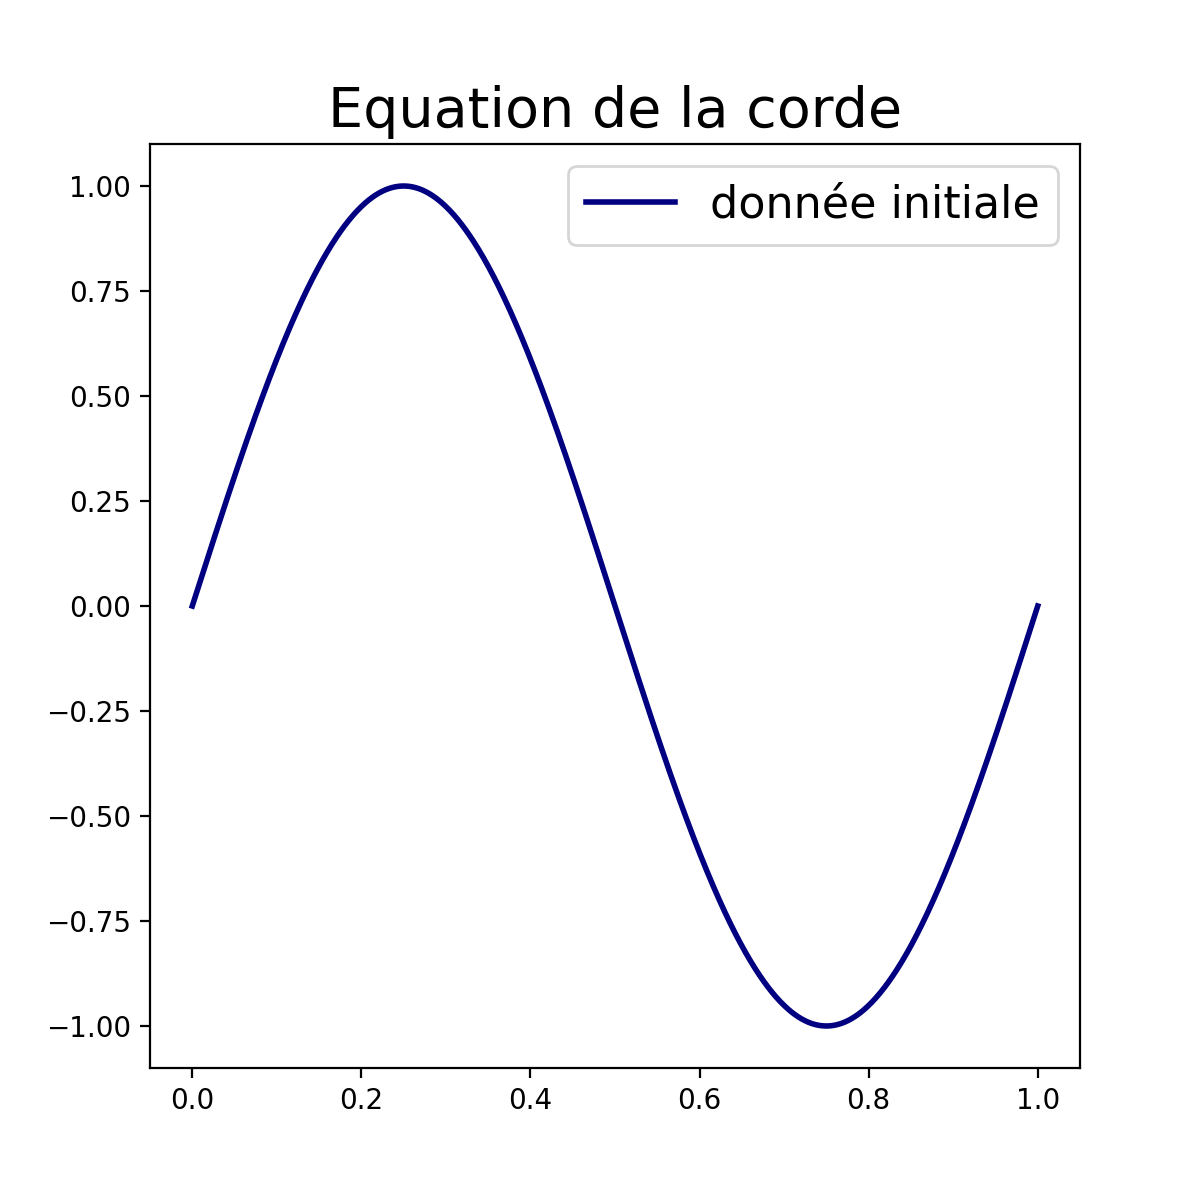

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x, u = init(N)
ax.plot(x, u, c='navy', linewidth=2, label='donnée initiale')
ax.legend(loc=1, fontsize=16)
ax.set_title('Equation de la corde', fontsize=20);
plt.savefig("figures/C06_init.png")

#### Question 3
> Implémentez la fonction `f2m` qui prend en argument deux tableaux `f` et `m` de taille $(3,N+1)$ et le paramètre `la` et qui modifie le tableau `m` par $ m_{k,l} = \sum_{j=0}^2 M_{k,j} f_{j,l}$, $0\leq k\leq 2$, $0\leq l\leq N$.
>
> Implémentez la fonction `m2f` qui prend en argument deux tableaux `f` et `m` de taille $(3,N+1)$ et le paramètre `la` et qui modifie le tableau `f` par $ f_{j,l} = \sum_{k=0}^2 M^{-1}_{j,k} m_{k,l}$, $0\leq j\leq 2$, $0\leq l\leq N$.

Les matrices $M$ et $M^{-1}$ sont définies par
$$ 
M = \begin{pmatrix} 1 & 1 & 1 \\ -\lambda & 0 & \lambda \\ \frac{\lambda^2}{2} & 0 & \frac{\lambda^2}{2} \end{pmatrix},
\qquad
M^{-1} = \begin{pmatrix} 0 & -\frac{1}{2\lambda} & \frac{1}{\lambda^2} \\ 1 & 0 & -\frac{2}{\lambda^2} \\ 0 & \frac{1}{2\lambda} & \frac{1}{\lambda^2} \end{pmatrix}.
$$

**Attention**: le tableau `m` doit être modifié, vous ne devez pas créer un nouvel objet.

In [6]:
def f2m(f, m, la):
    """
    transforme le tableau m par m = Mf
    
    Parameters
    ----------
    
    f: ndarray
       tableau de taille (3,N+1)
    m: ndarray
       tableau de taille (3,N+1)
    la: float
       vitesse de grille
    """
    M = np.array([
        [1, 1, 1],
        [-la, 0, la],
        [.5*la**2, 0, .5*la**2]
    ])
    m[:] = M @ f
    
def m2f(f, m, la):
    """
    transforme le tableau f par f = M^{-1}m
    
    Parameters
    ----------
    
    f: ndarray
       tableau de taille (3,N+1)
    m: ndarray
       tableau de taille (3,N+1)
    la: float
       vitesse de grille
    """
    iM = np.array([
        [0, -1/(2*la), 1/la**2],
        [1, 0, -2/la**2],
        [0, 1/(2*la), 1/la**2]        
    ])
    f[:] = iM @ m


#### Question 4
> Implémentez la fonction `equilibrium` qui prend en argument un tableau `m` de taille $(3,N+1)$ et qui modifie la $3^e$ ligne de $m$ selon la formule
$$ m_{2,l} = m_{0, l}/2, \qquad 0\leq l \leq N.$$

In [7]:
def equilibrium(m):
    """
    transforme le tableau m en le mettant à l'équilibre
    m_2 = m_0/2
    
    Parameters
    ----------
    
    m: ndarray
       tableau de taille (3,N+1)
    """
    m[2] = .5*m[0]

#### Question 5

> Proposez une fonction `init_scheme` qui prend en argument :
  * `x` un tableau de taille $N+1$ représentant le maillage en espace
  * `u` un tableau de taille $N+1$ représentant la solution initiale
  * `la` un réel pour la valeur de $\lambda$
>
> et qui retourne deux tableaux `f` et `m` de taille $(3, N+1)$ calculés selon l'algorithme suivant :
    >> - initialisez les tableaux `f` et `m` avec la valeur 0,
    >> - remplissez la première ligne de `m` selon la formule $m_{0,l} = u_l$, pour $0\leq l\leq N$,
    >> - utilisez la fonction `equilibrium` de la question précédente pour modifier `m`,
    >> - utilisez la fonction `m2f` pour modifier `f`.

In [8]:
def init_scheme(x, u, la):
    """
    initialisation du schéma
    
    Parameters
    ----------
    
    x: ndarray
       le maillage en espace de taille (N+1,)
    u: ndarray
       la solution initiale de taille (N+1,)
    la: float
       la vitesse de grille
    
    Returns
    -------
    
    f: ndarray
       tableau des densités de taille (3, N+1)
    m: ndarray
       tableau des moments de taille (3, N+1)
    """
    N = x.size - 1
    m = np.zeros((3, N+1))
    f = np.zeros((3, N+1))
    m[0] = u
    equilibrium(m)
    m2f(f, m, la)
    return f, m

#### Question 6
> - Créez une fenêtre graphique avec deux jeux d'axes l'un à côté de l'autre
> - Dans la partie gauche, tracez la donnée initiale comme à la question 2.
> - Dans la partie gauche, superposez les graphes des trois densités $f$ calculées à l'aide de la fonction `init_scheme`.

_Vous pourrez essayer d'obtenir une figure qui ressemble à celle ci-dessous :_
![Image de la question 6](figures/C06_movie_begin.png)

<IPython.core.display.Javascript object>


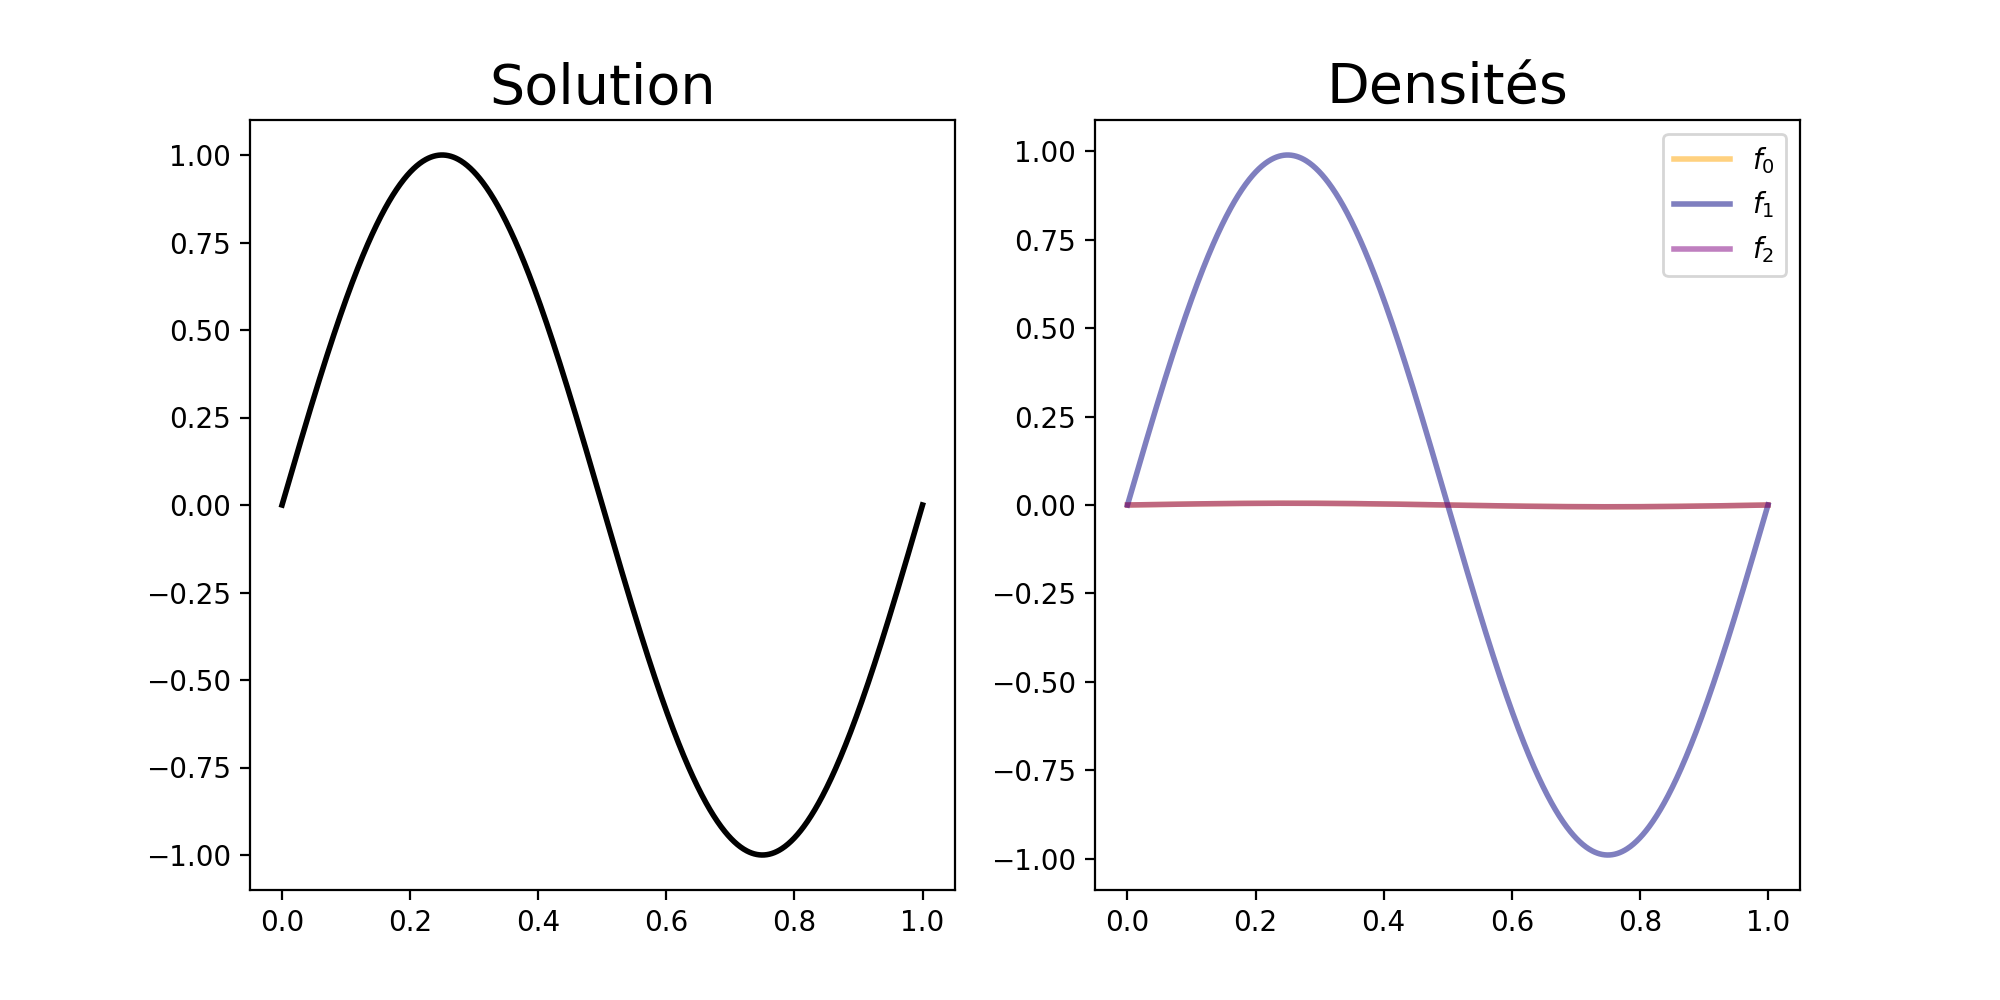

In [9]:
f, m = init_scheme(x, u, la)

fig, (axm, axf) = plt.subplots(1, 2, figsize=(10, 5))
lines = [axm.plot(x, m[0], linewidth=2, c='black')[0]]
axm.set_title('Solution', fontsize=20)
couleur = ['orange', 'navy', 'purple']
for j in range(3):
    lines.append(axf.plot(x, f[j], c=couleur[j], linewidth=2, label=r'$f_{:1d}$'.format(j), alpha=.5)[0])
axf.legend()
axf.set_title('Densités', fontsize=20);
plt.savefig('figures/C06_movie_begin.png')

#### Question 7
> Implémentez la fonction `relaxation` qui prend en argument un tableau `m` de taille $(3,N+1)$ et qui modifie la $3^e$ ligne de $m$ selon la formule
$$ m_{2,l} = m_{0, l} - m_{2, l}, \qquad 0\leq l \leq N.$$

(*attention : on part de 0 en python, les éléments de la troisième ligne sont bien les $m_{2,l}$*)

In [10]:
def relaxation(m):
    """
    transforme le tableau m après la phase de relaxation
    m_2 = m_0 - m_2
    
    Parameters
    ----------
    
    m: ndarray
       tableau de taille (3,N+1)
    """
    m[2] = m[0] - m[2]

#### Question 8
> Implémentez la fonction `transport` qui prend en argument un tableau `f` de taille $(3, N+1)$ et qui modifie
  * la première ligne selon les formules $f_{0,l} = f_{0,l+1}$, $0\leq l\leq N-1$, $f_{0,N}=f_{0,0}$,
  * la troisième ligne selon les formules $f_{2,l} = f_{2,l-1}$, $1\leq l\leq N$, $f_{2,0}=f_{2,N}$.

In [11]:
def transport(f):
    """
    fonction qui transporte les densités
    
    Parameters
    ----------
    
    f: ndarray
       le tableau des densités de taille (3, N+1)
    """
    # deplacement vers la gauche
    f[0, :-1] = f[0, 1:]
    # deplacement vers la droite
    f[2, 1:] = f[2, :-1]
    # condition de bord périodique
    f[0, -1] = f[0, 0]
    f[2, 0] = f[2, -1]

#### Question 9
> Exécutez cette dernière cellule pour visualiser la solution.

<IPython.core.display.Javascript object>


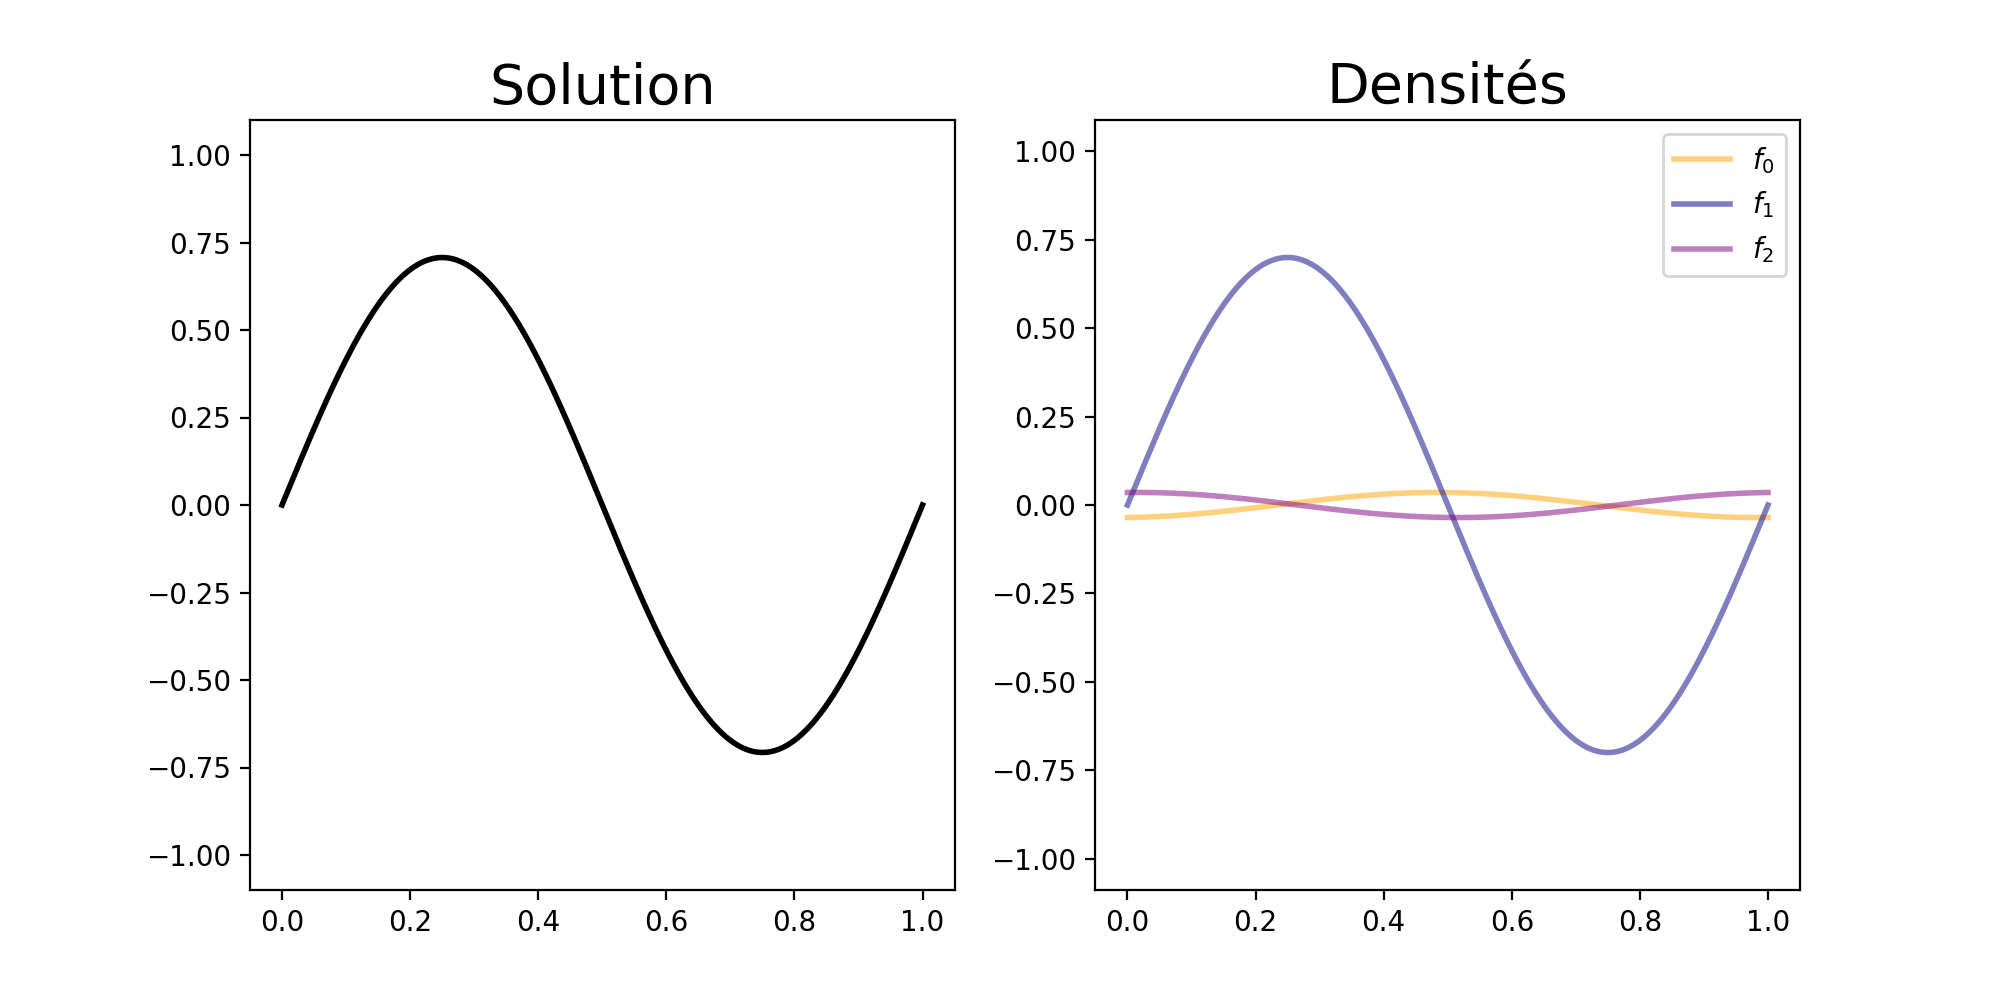

In [12]:
f, m = init_scheme(x, u, la)

fig, (axm, axf) = plt.subplots(1, 2, figsize=(10, 5))
lines = [axm.plot(x, m[0], linewidth=2, c='black')[0]]
axm.set_title('Solution', fontsize=20)
couleur = ['orange', 'navy', 'purple']
for j in range(3):
    lines.append(axf.plot(x, f[j], c=couleur[j], linewidth=2, label=r'$f_{:1d}$'.format(j), alpha=.5)[0])
axf.legend()
axf.set_title('Densités', fontsize=20);

def animate(i):
    niter = 10*N//128
    for k in range(niter):
        transport(f)
        f2m(f, m, la)
        relaxation(m)
        m2f(f, m, la)
    lines[0].set_data(x, m[0])
    for j in range(3):
        lines[j+1].set_data(x, f[j])
    return lines

anim = animation.FuncAnimation(
    fig, animate,
    frames=128, interval=12, 
    blit=True
)
plt.show()

In [11]:
#HTML(anim.to_html5_video())